In [175]:
#imports & config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin_tnc

pd.set_option('max_rows', 7)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4
np.set_printoptions(threshold=10)

In [91]:
#get data
exam_sores = pd.read_csv('ex2data1.txt',
                         names=['Exam1', 'Exam2', 'Admission'])
exam_sores.head()

,Exam1,Exam2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [96]:
exam_sores.describe()

,Exam1,Exam2,Admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
...,...,...,...
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [97]:
exam_sores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam1        100 non-null float64
Exam2        100 non-null float64
Admission    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


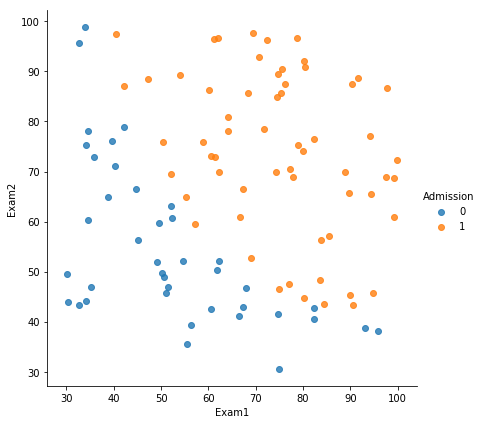

In [191]:
def drawChart():
    vis = sns.lmplot(data=exam_sores, x='Exam1', y='Exam2', 
                     fit_reg=False, hue='Admission', height=6)
    
drawChart()

In [98]:
#set variables
X = exam_sores.iloc[:, :-1]
m, n = X.shape
ones = np.ones((m, 1))
X = np.hstack((ones, X))
y = exam_sores.iloc[:, 2]
y = y[:, np.newaxis]
theta = np.zeros((n+1, 1)) # intializing theta with all zeros
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       ...,
       [ 1.        , 99.31500881, 68.77540947],
       [ 1.        , 55.34001756, 64.93193801],
       [ 1.        , 74.775893  , 89.5298129 ]])

In [70]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [84]:
sigmoid(0)

0.5

In [172]:
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
                        + np.multiply((1 - y), np.log(1 - sigmoid(X @ theta))))
    return J


print(costFunction(theta, X, y))

0.6931471805599453


In [107]:
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [108]:
gradient(theta, X, y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [176]:
arr = fmin_tnc(func=costFunction,
                x0=theta.flatten(),
                fprime=gradient,
                args=(X, y.flatten()))
arr

(array([-25.16131855,   0.20623159,   0.20147149]), 36, 0)

In [156]:
theta_optimized = arr[0]
theta_optimized

array([-25.16131855,   0.20623159,   0.20147149])

In [157]:
J = costFunction(theta_optimized[:, np.newaxis], X, y)
J

0.20349770158947486

In [158]:
#decision boundary
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_x

[28.05882244669796, 100.86943574220612]

In [159]:
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
                                + np.dot(theta_optimized[1],plot_x))
plot_y

array([96.16598104, 21.6350944 ])

In [160]:
mask = y.flatten() == 1
mask

array([False, False, False, ...,  True,  True,  True])

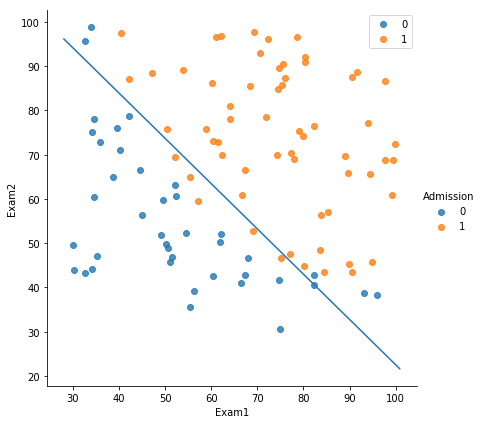

In [171]:
#matplotlib
#adm = plt.scatter(X[mask][:,1], X[mask][:,2])
#not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
#decision_boun = plt.plot(plot_x, plot_y)
#plt.xlabel('Exam 1 score')
#plt.ylabel('Exam 2 score')
#plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
#plt.show()

#use Seaborn :D
drawChart()
vis2 = sns.lineplot(plot_x, plot_y)

In [190]:
#predicting a new student 
#with scores exam1: 45, exam2: 85
#expected 0.776
sigmoid(np.dot([1, 45, 85], theta_optimized))

0.7762906215484426

In [179]:
def accuracy(theta, X, y, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)

In [180]:
accuracy(theta_optimized, X, y.flatten(), 0.5)

89.0


In [186]:
theta_optimized

array([-25.16131855,   0.20623159,   0.20147149])